  Nuclei Technologies
        Assignment-1  

Installing Face_Recognition package

In [2]:
!pip install face_recognition

Mount Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Finding the Histogram of oriented gradients of given image.

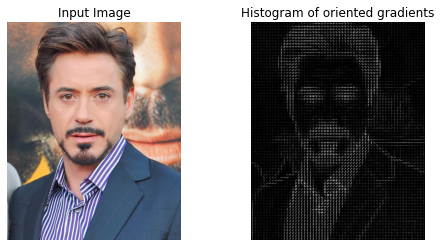

In [3]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data,exposure
import cv2
image=cv2.imread('/content/drive/My Drive/pics/Robert Downey Jr_1.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)
fig,(ax1,ax2)=plt.subplots(1, 2,figsize=(8, 4),sharex=True,sharey=True)
ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input Image')
hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of oriented gradients')
plt.show()

Face Detection and making rectangle around the face.

In [4]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2 
%matplotlib inline

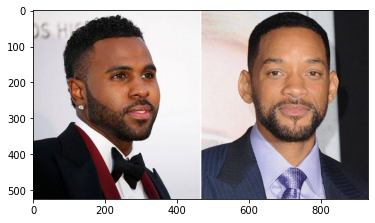

In [5]:
#load the jpg file into numpy array
image=cv2.imread('/content/drive/My Drive/pics/Jason-DeRulo--Will-Smith-Getty.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [6]:
#find all images in the image
face_locations=face_recognition.face_locations(image)
number_of_images=len(face_locations)
print("Found {} face(s) in input image.".format(number_of_images))

Found 2 face(s) in input image.


A face is located at pixel location left:613,top:118,right:835,bottom:341.
A face is located at pixel location left:167,top:118,right:390,bottom:341.


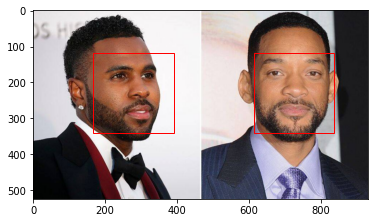

In [7]:
# get axis handle
plt.imshow(image)
ax=plt.gca()
# repeat for all faces found
for face_location in face_locations:
  #print the locations of each face in the image. each face is a list of co-ordinates in (top,right,bottom,left order).
  top,right,bottom,left=face_location
  x,y,w,h=left,top,right,bottom
  print("A face is located at pixel location left:{},top:{},right:{},bottom:{}.".format(x,y,w,h))
  #lets draw a box around the face
  rect=Rectangle((x,y),w-x,h-y,fill=False,color='red')
  ax.add_patch(rect)
plt.show()

Face Recognition

In [8]:
# load the unknown images(create a database)
image=cv2.imread('/content/drive/My Drive/pics/Chris Hemsworth_1.jpg')
chris_hemsworth=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.imread('/content/drive/My Drive/pics/Robert Downey Jr_1.jpg')
robert_downey_jr=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.imread('/content/drive/My Drive/pics/Tom-cruise_1.jpg')
Tom_cruise=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.imread('/content/drive/My Drive/pics/will-smith_1.jpg')
will_smith=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [9]:
chris_encoding=face_recognition.face_encodings(chris_hemsworth)[0]
robert_encoding=face_recognition.face_encodings(robert_downey_jr)[0]
Tom_encoding=face_recognition.face_encodings(Tom_cruise)[0]
will_smith_encoding=face_recognition.face_encodings(will_smith)[0]
#creating a database of all known face encodings
known_face_encodings=[
    chris_encoding,
    robert_encoding,
    Tom_encoding,
    will_smith_encoding
]

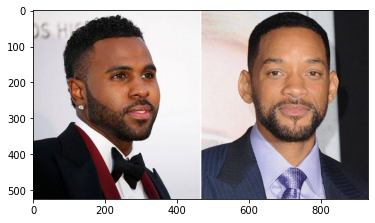

In [10]:
#load the image we want to check
image=cv2.imread('/content/drive/My Drive/pics/Jason-DeRulo--Will-Smith-Getty.jpg')
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
unknown_face_encodings=face_recognition.face_encodings(unknown_image)
plt.imshow(unknown_image)

Checking the image is in data base or not.

In [12]:
from scipy.spatial import distance
# there might be more than one person in the photo ,so we need to loop over each face we found
for unknown_face_encoding in unknown_face_encodings:
  #test if this unknown face encoding matches any of the the three
  #compute euclidean  distance
  results=[]
  for known_face_encoding in known_face_encodings:
    d=distance.euclidean(known_face_encoding,unknown_face_encoding)
    results.append(d)
  threshold=0.6
  results=np.array(results)<=threshold
  name="Unknown"
  if results[0]:
    name="Chris-hemsworth"
  elif results[1]:
    name="Robert-Downey-jr"
  elif results[2]:
    name="Tom-Cruise"
  elif results[3]:
    name="will-smith"
  print(f"Found {name} in the photo!")

Found will-smith in the photo!
Found Unknown in the photo!
